In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
#Importing dataset
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Unnamed: 0,Area,2015-10-04 00:00:00,2015-10-04 00:05:00,2015-10-04 00:10:00,2015-10-04 00:15:00,2015-10-04 00:20:00,2015-10-04 00:25:00,2015-10-04 00:30:00,2015-10-04 00:35:00,...,2015-10-04 23:10:00,2015-10-04 23:15:00,2015-10-04 23:20:00,2015-10-04 23:25:00,2015-10-04 23:30:00,2015-10-04 23:35:00,2015-10-04 23:40:00,2015-10-04 23:45:00,2015-10-04 23:50:00,2015-10-04 23:55:00
0,0,A1,3,12,4,9,5,14,4,4,...,6,2,11,8,6,8,8,5,9,5
1,1,A2,6,0,8,4,4,4,2,5,...,3,3,7,4,4,7,2,2,6,4
2,2,A3,7,6,10,4,7,3,1,4,...,0,0,10,12,10,12,5,2,12,9
3,3,A4,11,3,6,7,3,10,6,5,...,0,1,10,11,8,7,4,3,6,5
4,4,A5,7,7,10,13,7,16,12,7,...,15,16,36,26,17,24,13,8,12,8


In [5]:
#Getting np array
data= dataset.iloc[:,2:].values

In [6]:
scaler = StandardScaler()
#Scaling the data to handle euclidian distances
data = scaler.fit_transform(data)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Plotting Elbow graph

This graph is used to identify the number of clusters that might be pressent in a dataset. <br>
<b>Method: </b><br>
We calcuate/fetch a value from a cluster called WCSS or Within Cluster Sum of Squares. It is the sum of the square of all distances from a point to its final centroid. This value can be fetched using a property called <i>inertia_</i> from a cluster object

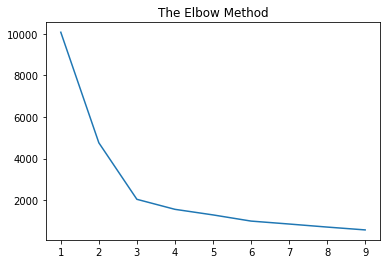

In [7]:
#Finding the number of clusters
wcss = []
#Gettign all cluster from 1 to 10 centroids
for x in range(1,10):
    km_final = KMeans(n_clusters=x , init = 'k-means++',max_iter = 100, n_init = 10, random_state=0)
    km_final.fit(data)
    #Appending the inertia to the wcss
    wcss.append(km_final.inertia_)
    
#Plotting the graph
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.show()

### Analysis of elbow graph
As the number of number of centroids/clusters increase, the WCSS of the cluster object decreases. Eventually, when the number of clusters is equal to number of points, the total wcss will be 0. However, if there is an appropriate number of centroids, after reaching that value, the decrease in WCSS will stop decreasing drastically. That point is called the elbow point and it's the appropriate number of clusters in that dataset.
<br><br>
The elbow at 3 represents that there are 3 classes in the dataset

In [22]:
#Applying K-means to our data set
km_final = KMeans(n_clusters=3 , init = 'k-means++',max_iter = 300)
#Fitting the data
km_final.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
#Fetching the lables
labels = km_final.predict(data)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


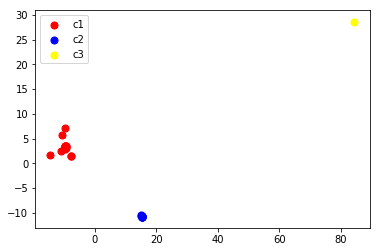

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
principalComponents = lda.fit_transform(data,labels)

plt.scatter(principalComponents[labels == 0 , 0],principalComponents[labels == 0 , 1],c = 'red',s = 50,label='c1')
plt.scatter(principalComponents[labels == 1 , 0],principalComponents[labels == 1 , 1],c = 'blue',s = 50,label='c2')
plt.scatter(principalComponents[labels == 2 , 0],principalComponents[labels == 2 , 1],c = 'yellow',s = 50,label = 'c3')

plt.legend()
plt.show()

### Making the classifier on cluster neighbours

In [25]:
#Training a decision tree classifier to 
classifier = DecisionTreeClassifier()
classifier.fit(data,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Reduced dimension decision tree
<img src = "Decision_Tree.png">